## An investigation of Anscombe's quartet dataset

add description here
download dataset from [here](https://web.stanford.edu/class/cs102/datasets/Anscombe.csv)

## Explain the background to the dataset
- who created it
- when it was created
- speculation on how it was created


### Who is the *Ancombe* in Anscombe's quartet?

![Francis Anscombe](img/Francis_Anscombe.jpeg)

<sub>By Yale Bulletin & CalendarNovember 2, 2001: Volume 30, Number 9, Fair use, https://en.wikipedia.org/w/index.php?curid=23138907</sub>

Francis Anscombe was a British statistician active from the mid to late twentieth century.He worked in agricultural experimental research and was a lecturer in Cambridge before becoming the founding chairperson of the statistics department in Yale university in 1953. He researched residuals in linear regression and later, he became interested in statistical computing. He emphasised that 
>"a computer should make both calculations and graphs" [ref](https://en.wikipedia.org/wiki/Frank_Anscombe)

Anscombe created his famous *Anscombe's quartet* dataset in 1973 to illustrate problems with only using descriptive statistics in analysing data ()[https://en.wikipedia.org/wiki/Anscombe%27s_quartet]. To show that descriptive statistics, when used without ancillary information, could be deceptive this he created the famous Anscombe's quartet 

## Anscombe's quartet

Mark Twain famously postulated 

>"There are three kinds of lies: lies, damned lies, and statistics".  [Twain, 1906](http://www.gutenberg.org/ebooks/19987) 

While this may be a somewhat extreme view of statistics, Anscombe sought to illustrate the dangers of being mislead by descriptive statistics.

### What are descriptive statistics?

There are different statistical methods used to analyse data. Descriptive statistics focus on the collection, presentation and measurement of the data, while inferential statistics look at what kind of hypothesis the data suggests [](https://explorable.com/branches-of-statistics). Descriptive statistical measures can be broadly broken down into 4 regions [](https://baselinesupport.campuslabs.com/hc/en-us/articles/204305665-Types-of-Descriptive-Statistics)

1. measures of frequency such as frequencies, percents, counts
2. measures of central tendencies, such as mean median and or mode
3. measures of spread such as range, standard deviation and variance 
4. measures of position, such ranks 


In 1973, Anscombe described the four datasets he created in his *American Statistician* article *"Graphs in Statistical Analysis"*[ref]().   




### Libraries
#### import the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
df = pd.read_csv("Anscombe.csv")
df


,X1,Y1,X2,Y2,X3,Y3,X4,Y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


### The 4 Datasets

This shows the four datasets each containing 11 x and y measurements; 
* Set I with x values X1 and y value Y1
* Set II with x values X2 and y value Y2
* Set III with x values X3 and y value Y3
* Set IV with x values X4 and y value Y4

no units are given so it may be that these sets are constructed and not actual measurements. 

### Visualise

### Plot the interesting aspects of the dataset

### Anscombe I


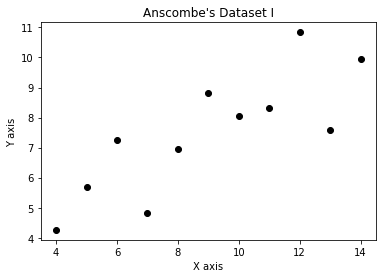

In [2]:
x1 = np.array(df['X1'])
y1 = np.array(df['Y1'])

plt.plot(x1, y1, 'ko')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Anscombe\'s Dataset I')
plt.show()

#### Describe the graph

This shows a scatter plot. It looks like a straight line with a positive slope might be suitable to model it. 

#### fit a linear regression line


The linear regression line slope is 0.5 
 with the y intercept  3.0


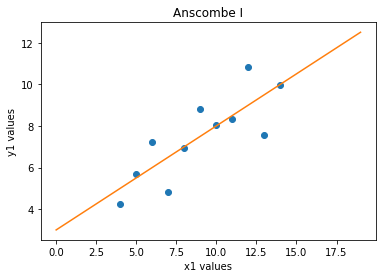

In [3]:
# Perform linear regression: to find slope m and y intercept c
m, c = np.polyfit(x1, y1, 1)

# Print the slope and y intercept
print("The linear regression line slope is",f"{m:.2}","\n","with the y intercept ", f"{c:.2}")

# plot regression line : y = mx + c
x = np.arange(0.0, 20, 1.0)
y = m * x + c

# Plot the Anscombe data and linear regression line
plt.plot(x1, y1, marker='o', linestyle='none')
plt.plot(x, y)

# Label the axes
plt.title("Anscombe I")
plt.xlabel('x1 values')
plt.ylabel('y1 values')

# Show the plot
plt.show()



This plot looks like a typical scatter plot with typical 'random' noise around the straight line
$$y=3x+5$$

### Anscombe II


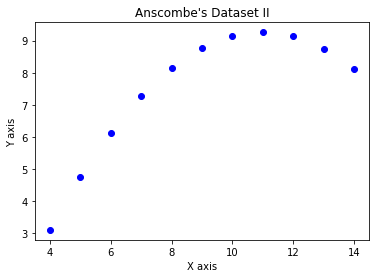

In [4]:
x2 = np.array(df['X2'])
y2 = np.array(df['Y2'])

plt.plot(x2, y2, 'bo')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Anscombe\'s Dataset II')
plt.show()

#### Describe the graph

This shows a very clear curvature of a quadratic equation with a maximum value - it would be best modeled by an equation such as 
$$ax^2 + bx + c = 0$$ with a negative $a$ value 


#### fit a linear regression line


The regression line that is produced with Anscombe II is exactly the same one as with Anscombe I namely, 

$y=3x + 5$ however this plot is **clearly** a quadratic and **not** a straight line. 



The linear regression line slope is 0.5 
 with the y intercept  3.0


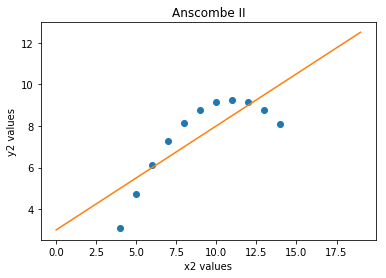

In [13]:

# Perform linear regression: to find slope m and y intercept c
m, c = np.polyfit(x2, y2, 1)

# Print the slope and y intercept
print("The linear regression line slope is",f"{m:.2}","\n","with the y intercept ", f"{c:.2}")

# plot regression line : y = mx + c
x = np.arange(0.0, 20, 1.0)
y = m * x + c

# Plot the Anscombe data linear regression line
plt.plot(x2, y2, marker='o', linestyle='none')
plt.plot(x, y)

# Label axes
plt.title("Anscombe II")
plt.xlabel('x2 values')
plt.ylabel('y2 values')

# Show the plot
plt.show()



the x squared coefficient is  -0.13 
 the x coefficient is  2.8 
 the constant is  -6.0
The equation of the best polynomial fit is          2
-0.1267 x + 2.781 x - 5.996


ValueError: x and y must have same first dimension, but have shapes (20,) and (11,)

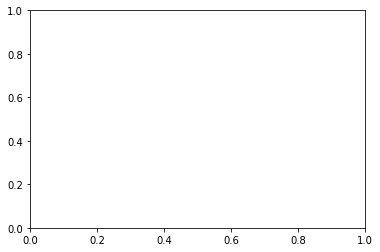

In [39]:
# see if there is a best curve
#x2 = np.array(df['X2'])
#y2 = np.array(df['Y2'])

# calculate polynomial
a, b, c = np.polyfit(x2, y2, 2)
eq = np.poly1d(z)
print("the x squared coefficient is ", f"{a:.2}","\n", "the x coefficient is ", f"{b:.2}", "\n", "the constant is ", f"{c:.2}")
print("The equation of the best polynomial fit is", f)

# Plot the Anscombe data polyfit line
x2_new = np.arange(0.0, 20, 1.0)
y2_new = (a*(x2**2)+b*x2+c)

#plt.plot(x2, y2, marker='o', linestyle='none')
plt.plot(x2_new, y2_new)
#
# Label axes
#plt.title("Anscombe II")
#plt.xlabel('x2 values')
#plt.ylabel('y2 values')

# Show the plot
#plt.show()



### Anscombe III


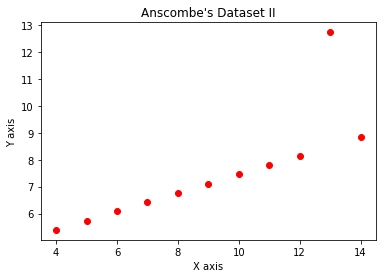

In [6]:
x3 = np.array(df['X3'])
y3 = np.array(df['Y3'])

plt.plot(x3, y3, 'ro')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Anscombe\'s Dataset II')
plt.show()

#### Describe the graph

This shows a ...

#### fit a linear regression line


The linear regression line slope is 0.5 
 with the y intercept  3.0


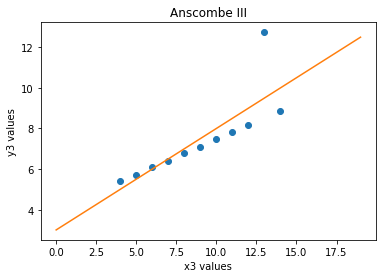

In [7]:

# Perform linear regression: to find slope m and y intercept c
m, c = np.polyfit(x3, y3, 1)

# Print the slope and y intercept
print("The linear regression line slope is",f"{m:.2}","\n","with the y intercept ", f"{c:.2}")

# plot regression line : y = mx + c
x = np.arange(0.0, 20, 1.0)
y = m * x + c

# Plot the Anscombe data linear regression line
plt.plot(x3, y3, marker='o', linestyle='none')
plt.plot(x, y)

# Label axes
plt.title("Anscombe III")
plt.xlabel('x3 values')
plt.ylabel('y3 values')

# Show the plot
plt.show()



### Anscombe IV


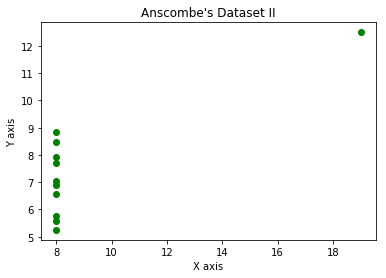

In [8]:
x4 = np.array(df['X4'])
y4 = np.array(df['Y4'])

plt.plot(x4, y4, 'go')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Anscombe\'s Dataset II')
plt.show()

#### Describe the graph

This shows a ...

#### fit a linear regression line


The linear regression line slope is 0.5 
 with the y intercept  3.0


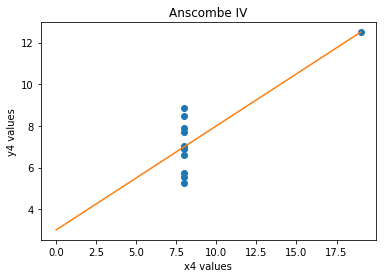

In [9]:


# Perform linear regression: to find slope m and y intercept c
m, c = np.polyfit(x4, y4, 1)

# Print the slope and y intercept
print("The linear regression line slope is",f"{m:.2}","\n","with the y intercept ", f"{c:.2}")

# plot regression line : y = mx + c
x = np.arange(0.0, 20, 1.0)
y = m * x + c

# Plot the Anscombe data linear regression line
plt.plot(x4, y4, marker='o', linestyle='none')
plt.plot(x, y)

# Label axes
plt.title("Anscombe IV")
plt.xlabel('x4 values')
plt.ylabel('y4 values')

# Show the plot
plt.show()



Text(0.5,1,"Anscombe's Datasets")

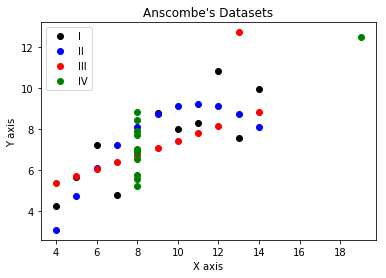

In [10]:
plt.plot(x1, y1, 'ko', label = "I")
plt.plot(x2, y2, 'bo', label = "II" )
plt.plot(x3, y3, 'ro', label = "III")
plt.plot(x4, y4, 'go', label = "IV")
plt.legend() 
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Anscombe\'s Datasets')

Each of these datasets showed similar if not identical descriptive statistics.




Anscombe's quartet comprises four datasets that have nearly identical simple descriptive statistics, yet appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties. He described the article as being intended to counter the impression among statisticians that "numerical calculations are exact, but graphs are rough."[1]
Contents

    1 Data
    2 See also
    3 References
    4 External links

Data

For all four datasets:
Property 	Value 	Accuracy
Mean of x 	9 	exact
Sample variance of x 	11 	exact
Mean of y 	7.50 	to 2 decimal places
Sample variance of y 	4.125 	±0.003
Correlation between x and y 	0.816 	to 3 decimal places
Linear regression line 	y = 3.00 + 0.500x 	to 2 and 3 decimal places, respectively
Coefficient of determination of the linear regression 	0.67 	to 2 decimal places

    The first scatter plot (top left) appears to be a simple linear relationship, corresponding to two variables correlated and following the assumption of normality.
    The second graph (top right) is not distributed normally; while a relationship between the two variables is obvious, it is not linear, and the Pearson correlation coefficient is not relevant. A more general regression and the corresponding coefficient of determination would be more appropriate.
    In the third graph (bottom left), the distribution is linear, but should have a different regression line (a robust regression would have been called for). The calculated regression is offset by the one outlier which exerts enough influence to lower the correlation coefficient from 1 to 0.816.
    Finally, the fourth graph (bottom right) shows an example when one outlier is enough to produce a high correlation coefficient, even though the other data points do not indicate any relationship between the variables.

The quartet is still often used to illustrate the importance of looking at a set of data graphically before starting to analyze according to a particular type of relationship, and the inadequacy of basic statistic properties for describing realistic datasets.[2][3][4][5][6]

The datasets are as follows. The x values are the same for the first three datasets.[1]
Anscombe's quartet I 	II 	III 	IV
x 	y 	x 	y 	x 	y 	x 	y
10.0 	8.04 	10.0 	9.14 	10.0 	7.46 	8.0 	6.58
8.0 	6.95 	8.0 	8.14 	8.0 	6.77 	8.0 	5.76
13.0 	7.58 	13.0 	8.74 	13.0 	12.74 	8.0 	7.71
9.0 	8.81 	9.0 	8.77 	9.0 	7.11 	8.0 	8.84
11.0 	8.33 	11.0 	9.26 	11.0 	7.81 	8.0 	8.47
14.0 	9.96 	14.0 	8.10 	14.0 	8.84 	8.0 	7.04
6.0 	7.24 	6.0 	6.13 	6.0 	6.08 	8.0 	5.25
4.0 	4.26 	4.0 	3.10 	4.0 	5.39 	19.0 	12.50
12.0 	10.84 	12.0 	9.13 	12.0 	8.15 	8.0 	5.56
7.0 	4.82 	7.0 	7.26 	7.0 	6.42 	8.0 	7.91
5.0 	5.68 	5.0 	4.74 	5.0 	5.73 	8.0 	6.89

It is not known how Anscombe created his datasets.[7] Since its publication, several methods to generate similar data sets with identical statistics and dissimilar graphics have been developed.[7][8] 





Libraries 

Visualise
Inputs and outputs
Classifier
Fit 
Predict
Evaluate


# Calculate descriptive stats

In [11]:
df.describe()


,X1,Y1,X2,Y2,X3,Y3,X4,Y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


add something about the descriptive stats

inferential stats - add something about inferential stats being similar

## Explain why the dataset is interesting refering to the plots and statistics